# 🏠 Notebook Overview

This notebook provides a structured workflow for house price prediction using the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).  

Each section will be as follows:

- 🏆 Kaggle Setup: 
- 📥 Data Loading and Initial Exploration
- 🚨 Outlier Detection and Removal
- 🔗 Data Combination for Preprocessing
- 🧩 Missing Value Imputation
- 🛠️ Feature Engineering
- 📦 Final Data Preparation
- 🤖 Models Training and Evaluation
- 🏆 Kaggle Submission

# Kaggle Setup
## 📝 1 Create & Prep Your Account
1. Go to https://www.kaggle.com and Sign Up / Log In.
2. Complete profile (photo, short bio, location) – it increases trust when others view your notebooks.
3. (Optional but good) Enable 2FA under Settings > Account.

## 📜 2 Accept Competition Rules
Before you can download data you MUST open the competition page and click: Join Competition / I Understand & Accept. Do this for every new competition (even “Getting Started” ones) or the API will return 403 errors.

## 🔑 3 Generate an API Token
1. Click your profile avatar (top-right) → Settings.
2. Scroll to “API” section → Create New Token.
3. This downloads `kaggle.json` (contains username + key). Keep it private.
4. Upload `kaggle.json` to your environment and follow the steps below.
5. Move `kaggle.json` to the location `~/.kaggle/kaggle.json`, sometimes `~/.config/kaggle/kaggle.json` (Linux/Mac) or `C:\Users\<Windows-username>\.kaggle\kaggle.json` (Windows).
6. Set file permissions to read-only: `chmod 600 ~/.kaggle/kaggle.json`.


## 📊 Downloading Data

The following uses kaggle command line tool to download the data. If you have already downloaded the data, you can skip this step.

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -p data

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


The following cell unzips the downloaded files. If you have already unzipped the files, you can skip this step.

In [2]:
import zipfile
import os
with zipfile.ZipFile(os.path.join('data','house-prices-advanced-regression-techniques.zip'), 'r') as zip_ref:
    zip_ref.extractall('data')

Import necessary libraries.

In [3]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations and array handling
import numpy as np
# Import matplotlib for plotting and visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization (built on top of matplotlib)
import seaborn as sns

# Set seaborn plot style to 'whitegrid' for better readability of plots
sns.set_style('whitegrid')
# Enable inline plotting in Jupyter Notebook so plots appear in the output cells
%matplotlib inline

# Import display from IPython to display DataFrames and other objects in a readable format
from IPython.display import display

# Import warnings module to control warning messages
import warnings
# Ignore all warnings to keep notebook output clean and focused
warnings.filterwarnings('ignore')

## 📊 Data loading
Load the dataset and display the first few rows to get an initial understanding of the data structure.

In [4]:
# Load training and test datasets from CSV files
train_data = pd.read_csv(os.path.join('data', 'train.csv'))
test_data = pd.read_csv(os.path.join('data', 'test.csv'))

# Print the shape (number of rows and columns) of the training data
print(train_data.shape)
# Display the first row of the training data for a quick preview
display(train_data.head(5))
# Uncomment the next line to display detailed info about training data columns and types
# display(train_data.info())

# Print the shape of the test data
print(test_data.shape)
# Display the first row of the test data for a quick preview
display(test_data.head(5))
# Uncomment the next line to display detailed info about test data columns and types
# display(test_data.info())

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

## 📊 Data Preparation

## Outlier Detection and Removal

- **Why Outlier Detection Matters:**  
  - 🚨 Outlier detection is essential for building robust predictive models.
  - 🚨 Some outliers can distort statistical analyses, bias model training, and reduce generalizability to unseen data. **Most outliers belong to this group and must be removed.**
  - 🚨 Some outliers are significant data that we are after to detect

- **Approach:**  
  - 🔍 By identifying and removing extreme values that do not exist in the test set, we ensure the model learns patterns representative of the real-world data distribution.

- **Benefits:**  
  - ✅ Improves accuracy and reliability of predictions  
  - ✅ Prevents overfitting  
  - ✅ Enhances interpretability of downstream analyses

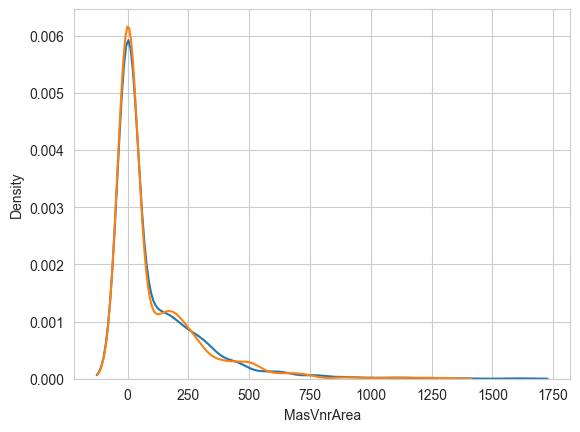

In [6]:
# Explanation:
# - This code visualizes the distribution of some of the features for both train and test datasets.
# - It helps to identify outliers and compare distributions between train and test sets.

# Plot the kernel density estimate (KDE) for the MasVnrArea column in the training data. MasVnrArea refers to Masonry veneer area in square feet
test_column = 'MasVnrArea'
sns.kdeplot(train_data[test_column])
sns.kdeplot(test_data[test_column])
plt.show()

### 📊 Checking for outliers in MasVnrArea
### Most values are clustered below ~1000 (see density plot 📈), so anything above 1500 is very rare 🚩.
### We print how many such extreme values exist in train and test sets to decide if they need special handling 🛠️.



In [7]:
# Print the number of records in the training set where MasVnrArea > 1500 (potential outliers)
print('train:', train_data[test_column][train_data[test_column] > 1500].shape)
# Print the number of records in the test set where MasVnrArea > 1500 (potential outliers)
print('test:', test_data[test_column][test_data[test_column] > 1500].shape)

train: (1,)
test: (0,)


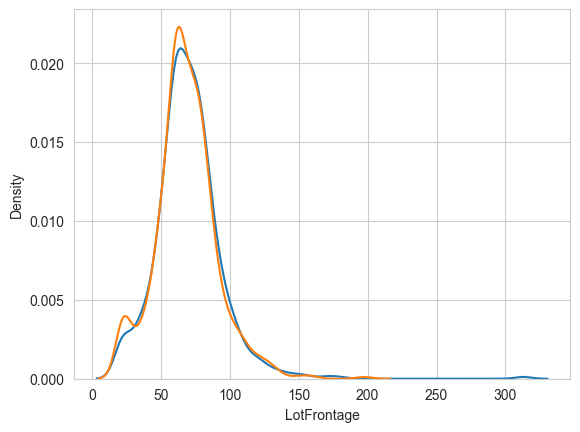

In [8]:
# Explanation:
# - This code visualizes the distribution of LotFrontage feature for both train and test datasets.

# Plot the KDE for the MasVnrArea column in the test data
test_column = 'LotFrontage'
sns.kdeplot(train_data[test_column])
sns.kdeplot(test_data[test_column])
plt.show()

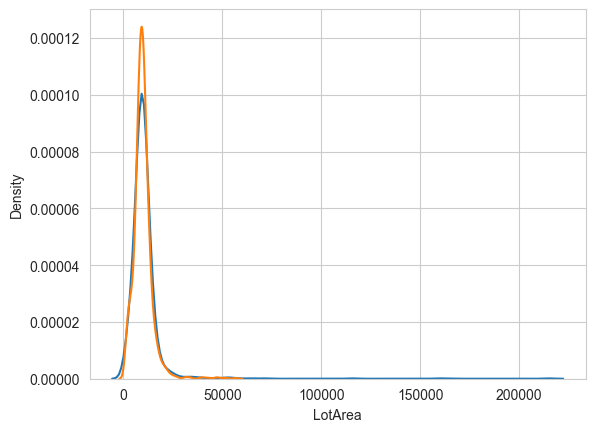

In [9]:
# Explanation:
# - This code visualizes the distribution of LotArea feature for both train and test datasets.


# Plot the KDE for the MasVnrArea column in the test data
test_column = 'LotArea'
sns.kdeplot(train_data[test_column])
sns.kdeplot(test_data[test_column])
plt.show()

### 🚀 Outlier Removal

We remove extreme values in **LotFrontage**, **LotArea**, and **MasVnrArea** from the training set because such unusual cases do not exist in the data set.
This ensures the model doesn’t learn patterns that won’t generalize well. ✅

* **LotFrontage > 200** 🏡
* **LotArea > 70,000** 🌍
* **MasVnrArea > 1500** 🧱

The `shape` print statements show how many records were removed 📉, and `train_length` is updated to reflect the new size of the training set 📊.


In [ ]:

# Print the shape of the training data before removing outliers
print(train_data.shape)

# # Remove records from train_data where LotFrontage > 200 (outliers not present in test set)
# train_data.drop(train_data[train_data["LotFrontage"] > 200].index, inplace=True)

# # Remove records from train_data where LotArea > 70000 (outliers not present in test set)
# train_data.drop(train_data[train_data["LotArea"] > 70000].index, inplace=True)

# # Remove records from train_data where MasVnrArea > 1500 (outliers not present in test set)
# train_data.drop(train_data[train_data["MasVnrArea"] > 1500].index, inplace=True)

# Print the shape of the training data after removing outliers
print(train_data.shape)

# Store the updated number of records in train_data after outlier removal
train_length = train_data.shape[0]

(1460, 80)
(1460, 80)


## Data Combination for Preprocessing

- 🔄 **Why Combine Datasets?**  
    Combining training and test datasets before preprocessing ensures that all transformations—such as missing value imputation, encoding, and feature engineering—are applied consistently. This unified approach prevents discrepancies and data leakage, maintaining data integrity.

- 🧩 **Benefits:**  
    - Consistent feature transformations  
    - Improved model generalizability  
    - Avoids data leakage between train and test sets  
    - Simplifies workflow for downstream modeling

- 🚀 **Summary:**  
    By processing train and test data together, we ensure that the model is trained and evaluated on data that has undergone identical preprocessing steps.

In [11]:
# Combine train and test datasets for feature engineering and preprocessing.
# - The first line concatenates the training data (up to and including 'SalePrice') and the test data.
# - This is useful for applying transformations (like encoding or imputing missing values) consistently across both datasets.
combined_data = pd.concat([train_data.loc[:, : 'SalePrice'], test_data])

# Align columns to match the test_data structure.
# - This ensures that combined_data has the same columns as test_data, which is important for making predictions later.
combined_data = combined_data[test_data.columns]

# Display the first row of the combined dataset for a quick preview.
display(combined_data.head(3))

# Print the shape (number of rows and columns) of the combined dataset.
print(combined_data.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


(2919, 79)


## Missing Value Imputation

Missing value imputation is a crucial step in any data preprocessing workflow.  
- 🛡️ **Ensures Data Integrity:** Handling missing values prevents errors and inconsistencies during analysis and modeling.
- 📈 **Improves Model Performance:** Proper imputation strategies help models learn from complete data, reducing bias and variance.
- 🧠 **Preserves Information:** Thoughtful imputation (using domain knowledge or feature relationships) retains as much useful information as possible.
- 🚀 **Enables Feature Engineering:** Clean, imputed data allows for robust feature creation and transformation in later steps.

By addressing missing values systematically, we build a solid foundation for accurate and reliable predictive modeling.

In [12]:
# Get columns with missing data in the combined dataset
has_null_columns = combined_data.columns[combined_data.isnull().any()].tolist()

# Count missing values for each column in train, test, and combined datasets
train_null = train_data[has_null_columns].isnull().sum()
test_null = test_data[has_null_columns].isnull().sum()
combined_null = combined_data[has_null_columns].isnull().sum()

print('how many data missed each column of train/test/conbine datas')

# Create a DataFrame to summarize missing values for each column across datasets
missed_data = pd.DataFrame(
    data=[train_null, test_null, combined_null],
    index=['train', 'test', 'conbine'],
    columns=has_null_columns
)

# Display the summary DataFrame
missed_data

# Explanation:
# - has_null_columns: List of columns in combined_data that have missing values.
# - train_null, test_null, combined_null: Series showing the count of missing values for each column in train, test, and combined datasets.
# - missed_data: DataFrame that organizes the missing value counts for easy comparison.
# - This helps to quickly identify which columns have missing data and how much is missing in each dataset.

how many data missed each column of train/test/conbine datas


,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
train,0,259,1369,0,0,0,872,8,37,37,...,81,81,0,0,81,81,1453,1179,1406,0
test,4,227,1352,2,1,1,894,15,44,45,...,78,78,1,1,78,78,1456,1169,1408,1
conbine,4,486,2721,2,1,1,1766,23,81,82,...,159,159,1,1,159,159,2909,2348,2814,1


In [13]:
print(f"{len(combined_null[combined_null>0])} features to be handled")

34 features to be handled


In [14]:
for feature, missing_count in combined_null[combined_null > 0].items():
    print(f"Feature: {feature} Missing: {missing_count}")
    col_data = combined_data[feature]
    if pd.api.types.is_numeric_dtype(col_data):
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        cv = std / mean if mean != 0 else float('nan')
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  CV: {cv}")
    else:
        categories = col_data.dropna().unique()
        print(f"  Categories: {categories}")
    print()

Feature: MSZoning Missing: 4
  Categories: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Feature: LotFrontage Missing: 486
  Mean: 69.30579531442663
  Median: 68.0
  CV: 0.3368391431195068

Feature: Alley Missing: 2721
  Categories: ['Grvl' 'Pave']

Feature: Utilities Missing: 2
  Categories: ['AllPub' 'NoSeWa']

Feature: Exterior1st Missing: 1
  Categories: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Feature: Exterior2nd Missing: 1
  Categories: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

Feature: MasVnrType Missing: 1766
  Categories: ['BrkFace' 'Stone' 'BrkCmn']

Feature: MasVnrArea Missing: 23
  Mean: 102.20131215469613
  Median: 0.0
  CV: 1.7547157590923699

Feature: BsmtQual Missing: 81
  Categories: ['Gd' 'TA' 'Ex' 'Fa']

Feature: BsmtCond Missing: 82
  Categories: ['TA' 'G

decleare a function to fill the missing values in the dataset and apply appropriate imputation strategies based on the nature of each feature.

In [15]:
def fill_missing_combined_data(column, value):
    # Fill missing values in the specified column of combined_data with the provided value.
    # This function locates all rows in combined_data where the given column is null (missing),
    # and sets those entries to the specified value.
    # Useful for handling missing data during preprocessing and feature engineering.
    combined_data.loc[combined_data[column].isnull(),column] = value

**LotFrontage/LotArea**

For missing LotFrontage (Linear feet of street connected to property), the average value is usually used for imputation, but it may be related to different Neighborhoods.

In [16]:
# Find numeric features with missing value count less than 100
numeric_cols = combined_data.select_dtypes(include=[np.number]).columns
subset_cols = []
for col in numeric_cols:
    missing_count = combined_data[col].isnull().sum()
    if 0 < missing_count < 500 and col not in subset_cols:
        subset_cols.append(col)
    if missing_count > 0:
        print(f"{col}: {missing_count}")
print(f"cols we use to drop na rows: {subset_cols}")

LotFrontage: 486
MasVnrArea: 23
BsmtFinSF1: 1
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
BsmtFullBath: 2
BsmtHalfBath: 2
GarageYrBlt: 159
GarageCars: 1
GarageArea: 1
cols we use to drop na rows: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [17]:
## remove those features that are categorical in nature but labeled with numeric values
## These are: 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath'
subset_cols =['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageArea']

In [18]:
# Calculate the Pearson correlation coefficient between LotFrontage and SalePrice in the training data
correlation = train_data['LotFrontage'].corr(train_data['SalePrice'])
print(f"Pearson correlation (LotFrontage, SalePrice): {correlation}")

Pearson correlation (LotFrontage, SalePrice): 0.351799096570678


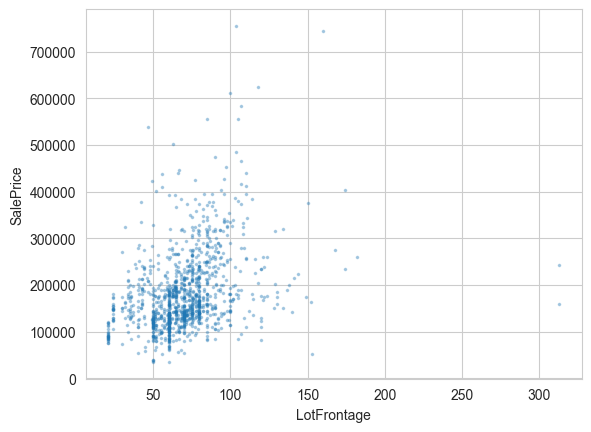

In [19]:
plt.scatter(train_data['LotFrontage'], train_data['SalePrice'], marker='.', s=10, alpha=0.3)
# plt.xlim(-1000, 50000)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

In [21]:
# ## method 1
# # Drop rows with missing values in these columns
# combined_data.dropna(subset=subset_cols, inplace=True)



## method 2
# for features in subset_cols, if cv is low, replace missing values with mean otherwise replace missing values with median
for col in subset_cols:
    col_data = combined_data[col]
    mean = col_data.mean()
    median = col_data.median()
    std = col_data.std()
    cv = std / mean if mean != 0 else float('nan')
    if cv < 0.5:
        combined_data[col].fillna(mean, inplace=True)
        print(f"{col}: mean={mean:.2f}, median={median:.2f}, cv={cv:.2f} -> replaced with mean")
    else:
        combined_data[col].fillna(median, inplace=True)
        print(f"{col}: mean={mean:.2f}, median={median:.2f}, cv={cv:.2f} -> replaced with median")

LotFrontage: mean=69.31, median=68.00, cv=0.34 -> replaced with mean
MasVnrArea: mean=102.20, median=0.00, cv=1.75 -> replaced with median
BsmtFinSF1: mean=441.42, median=368.50, cv=1.03 -> replaced with median
BsmtFinSF2: mean=49.58, median=0.00, cv=3.41 -> replaced with median
BsmtUnfSF: mean=560.77, median=467.00, cv=0.78 -> replaced with median
TotalBsmtSF: mean=1051.78, median=989.50, cv=0.42 -> replaced with mean
GarageYrBlt: mean=1978.11, median=1979.00, cv=0.01 -> replaced with mean
GarageArea: mean=472.87, median=480.00, cv=0.46 -> replaced with mean


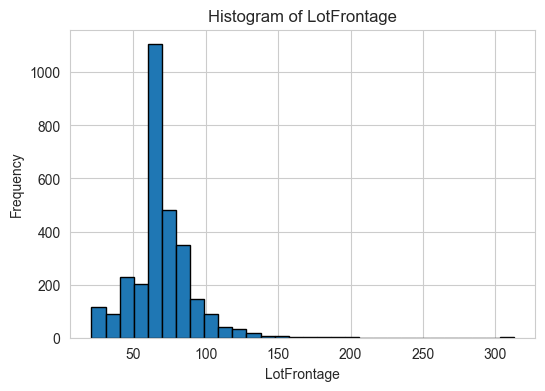

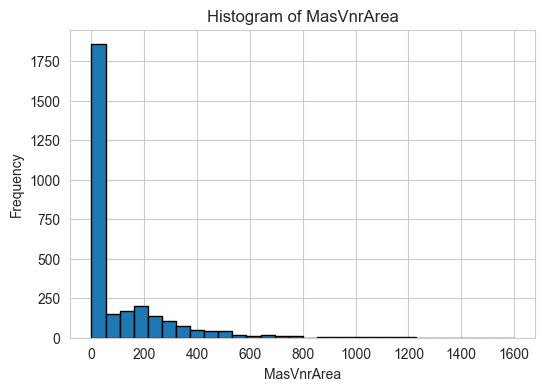

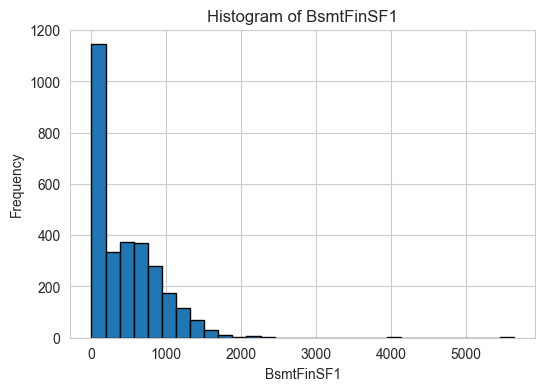

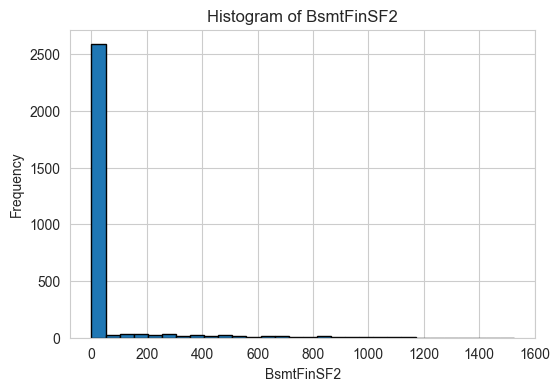

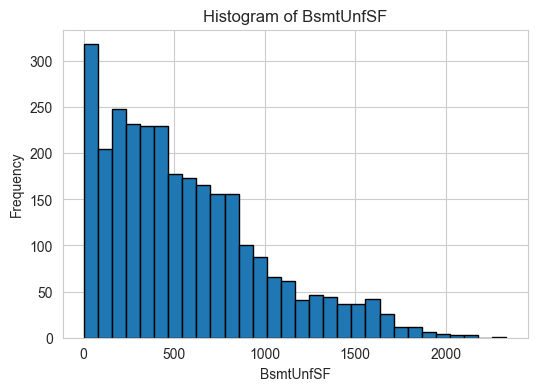

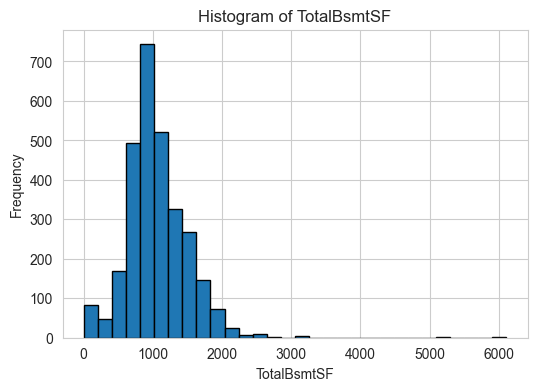

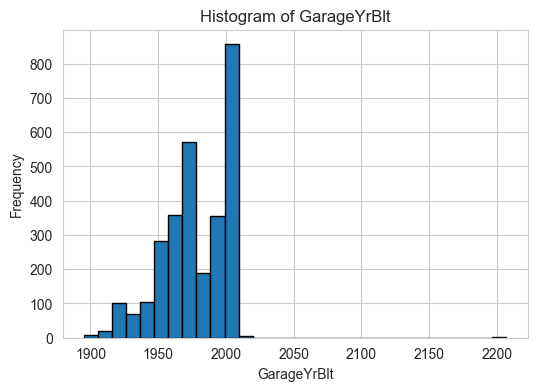

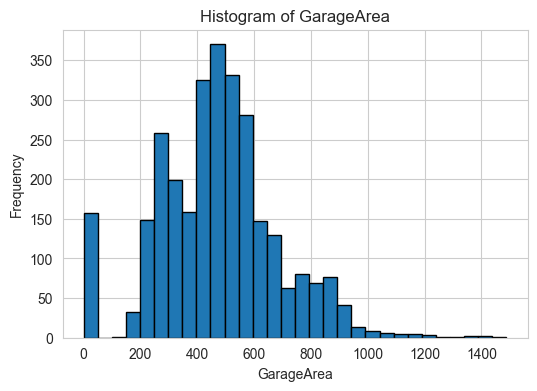

In [22]:
for feature in subset_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(combined_data[feature].dropna(), bins=30, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

In [23]:
combined_null = combined_data[has_null_columns].isnull().sum()
for feature, missing_count in combined_null[combined_null > 0].items():
    print(f"Feature: {feature} Missing: {missing_count}")
    col_data = combined_data[feature]
    if pd.api.types.is_numeric_dtype(col_data):
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        cv = std / mean if mean != 0 else float('nan')
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  CV: {cv}")
    else:
        categories = col_data.dropna().unique()
        print(f"  Categories: {categories}")
    print()

Feature: MSZoning Missing: 4
  Categories: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Feature: Alley Missing: 2721
  Categories: ['Grvl' 'Pave']

Feature: Utilities Missing: 2
  Categories: ['AllPub' 'NoSeWa']

Feature: Exterior1st Missing: 1
  Categories: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Feature: Exterior2nd Missing: 1
  Categories: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

Feature: MasVnrType Missing: 1766
  Categories: ['BrkFace' 'Stone' 'BrkCmn']

Feature: BsmtQual Missing: 81
  Categories: ['Gd' 'TA' 'Ex' 'Fa']

Feature: BsmtCond Missing: 82
  Categories: ['TA' 'Gd' 'Fa' 'Po']

Feature: BsmtExposure Missing: 82
  Categories: ['No' 'Gd' 'Mn' 'Av']

Feature: BsmtFinType1 Missing: 79
  Categories: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']

Feature: BsmtFinType2 Missi

In [24]:
# Find categorical features with missing value count less than 100
subset_cols = []
for col in combined_data.columns:
    missing_count = combined_data[col].isnull().sum()
    if 0 < missing_count < 500 and col not in subset_cols:
        subset_cols.append(col)
        print(f"{col}: {missing_count}")
print(f"cols we use to drop na rows: {subset_cols}")

MSZoning: 4
Utilities: 2
Exterior1st: 1
Exterior2nd: 1
BsmtQual: 81
BsmtCond: 82
BsmtExposure: 82
BsmtFinType1: 79
BsmtFinType2: 80
Electrical: 1
BsmtFullBath: 2
BsmtHalfBath: 2
KitchenQual: 1
Functional: 2
GarageType: 157
GarageFinish: 159
GarageCars: 1
GarageQual: 159
GarageCond: 159
SaleType: 1
cols we use to drop na rows: ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'SaleType']


In [25]:
# Drop rows with missing values in these columns
combined_data.dropna(subset=subset_cols, inplace=True)

In [26]:
combined_null = combined_data[has_null_columns].isnull().sum()
for feature, missing_count in combined_null[combined_null > 0].items():
    print(f"Feature: {feature} Missing: {missing_count}")
    col_data = combined_data[feature]
    if pd.api.types.is_numeric_dtype(col_data):
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        cv = std / mean if mean != 0 else float('nan')
        print(f"  Mean: {mean}")
        print(f"  Median: {median}")
        print(f"  CV: {cv}")
    else:
        categories = col_data.dropna().unique()
        print(f"  Categories: {categories}")
    print()

Feature: Alley Missing: 2505
  Categories: ['Grvl' 'Pave']

Feature: MasVnrType Missing: 1556
  Categories: ['BrkFace' 'Stone' 'BrkCmn']

Feature: FireplaceQu Missing: 1222
  Categories: ['TA' 'Gd' 'Fa' 'Ex' 'Po']

Feature: PoolQC Missing: 2670
  Categories: ['Ex' 'Fa' 'Gd']

Feature: Fence Missing: 2150
  Categories: ['MnPrv' 'GdWo' 'GdPrv' 'MnWw']

Feature: MiscFeature Missing: 2587
  Categories: ['Shed' 'Gar2' 'Othr' 'TenC']



In [27]:
## the remaining features are not actually missing values. In these, nan means no. So, we replace with 'NA' and later give them a numeric value as a unique category
for feature, _ in combined_null[combined_null > 0].items():
    fill_missing_combined_data(feature, 'NA')

In [31]:
# Print the names of columns in combined_data that have object (string/categorical) dtype
object_columns = combined_data.select_dtypes(include=['object']).columns.tolist()
# Print unique values for each object (categorical) column in combined_data
for col in object_columns:
    unique_vals = combined_data[col].unique()
    print(f"{col}: {unique_vals}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: ['NA' 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['V

In [32]:
categorical_data = combined_data[object_columns]

In [33]:
categorical_data.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [34]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to all columns in categorical_data
label_encoders = {}
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col].astype(str))
    label_encoders[col] = le

In [35]:
categorical_data.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,1,8,4


In [43]:
X_category = np.array(categorical_data)

In [36]:
## make sure no object in data
for feature, t in categorical_data.dtypes.items():
    if t == 'object':
        print(f"{feature}: {t}")

In [37]:
numeric_data = combined_data.drop(columns=object_columns)

In [38]:
numeric_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,...,336.0,160,0,0,0,0,0,0,5,2006
1452,160,21.0,1533,4,5,1970,1970,0.0,408.0,0.0,...,286.0,0,0,0,0,0,0,0,12,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [39]:
print("Combined data shape:", combined_data.shape)
print("Numeric data shape:", numeric_data.shape)
print("Categorical shape:", categorical_data.shape)

Combined data shape: (2680, 79)
Numeric data shape: (2680, 36)
Categorical shape: (2680, 43)


In [40]:
X_numeric = np.array(numeric_data)

In [42]:
# Subtract the mean of each column in X_numeric from the column values
X_numeric_scaled = (X_numeric - np.mean(X_numeric, axis=0))/np.std(X_numeric, axis=0)

In [49]:
X = np.concatenate([X_numeric_scaled, X_category], axis=1)

In [50]:
X.shape

(2680, 79)

### Plot a histogram for every column in X

In [ ]:
# Plot a histogram for every column in X
for i, col in enumerate(numeric_data.columns.tolist() + categorical_data.columns.tolist()):
    plt.figure(figsize=(6, 4))
    plt.hist(X[:, i], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()



#### End of Plot a histogram for every column in X

In [ ]:
# Combine train and test datasets for feature engineering and preprocessing.
# - The first line concatenates the training data (up to and including 'SalePrice') and the test data.
# - This is useful for applying transformations (like encoding or imputing missing values) consistently across both datasets.
combined_data = pd.concat([train_data.loc[:, : 'SalePrice'], test_data])

# Align columns to match the test_data structure.
# - This ensures that combined_data has the same columns as test_data, which is important for making predictions later.
combined_data = combined_data[test_data.columns]



(2680, 79)

In [58]:
X_train = X[:train_data.shape[0], :]
X_test  = X[train_data.shape[0]:, :]
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1460, 79)
X_test shape: (1220, 79)


In [60]:
y_train = train_data["SalePrice"].values

In [64]:
print("Number of null values in y_train:", np.isnan(y_train).sum())

Number of null values in y_train: 0


Neighborhood is a location attribute that represents the nearby place name and can be converted to latitude and longitude.

In [ ]:
# Map latitude values to each Neighborhood in combined_data.
# Explanation:
# - combined_data["Neighborhood"] contains the neighborhood name for each house.
# - .replace({...}) maps each neighborhood to its corresponding latitude value.
# - This creates a new column "latitude" with the latitude for each house based on its neighborhood.
combined_data["latitude"] = combined_data.Neighborhood.replace(
                                               {'Blmngtn' : 42.062806,
                                                'Blueste' : 42.009408,
                                                'BrDale' : 42.052500,
                                                'BrkSide': 42.033590,
                                                'ClearCr': 42.025425,
                                                'CollgCr': 42.021051,
                                                'Crawfor': 42.025949,
                                                'Edwards': 42.022800,
                                                'Gilbert': 42.027885,
                                                'GrnHill': 42.000854,
                                                'IDOTRR' : 42.019208,
                                                'Landmrk': 42.044777,
                                                'MeadowV': 41.991866,
                                                'Mitchel': 42.031307,
                                                'NAmes'  : 42.042966,
                                                'NoRidge': 42.050307,
                                                'NPkVill': 42.050207,
                                                'NridgHt': 42.060356,
                                                'NWAmes' : 42.051321,
                                                'OldTown': 42.028863,
                                                'SWISU'  : 42.017578,
                                                'Sawyer' : 42.033611,
                                                'SawyerW': 42.035540,
                                                'Somerst': 42.052191,
                                                'StoneBr': 42.060752,
                                                'Timber' : 41.998132,
                                                'Veenker': 42.040106})

# Map longitude values to each Neighborhood in combined_data.
# Explanation:
# - Similar to latitude, this maps each neighborhood to its longitude value.
# - The new column "longitude" contains the longitude for each house based on its neighborhood.
combined_data["longitude"] = combined_data.Neighborhood.replace(
                                               {'Blmngtn' : -93.639963,
                                                'Blueste' : -93.645543,
                                                'BrDale' : -93.628821,
                                                'BrkSide': -93.627552,
                                                'ClearCr': -93.675741,
                                                'CollgCr': -93.685643,
                                                'Crawfor': -93.620215,
                                                'Edwards': -93.663040,
                                                'Gilbert': -93.615692,
                                                'GrnHill': -93.643377,
                                                'IDOTRR' : -93.623401,
                                                'Landmrk': -93.646239,
                                                'MeadowV': -93.602441,
                                                'Mitchel': -93.626967,
                                                'NAmes'  : -93.613556,
                                                'NoRidge': -93.656045,
                                                'NPkVill': -93.625827,
                                                'NridgHt': -93.657107,
                                                'NWAmes' : -93.633798,
                                                'OldTown': -93.615497,
                                                'SWISU'  : -93.651283,
                                                'Sawyer' : -93.669348,
                                                'SawyerW': -93.685131,
                                                'Somerst': -93.643479,
                                                'StoneBr': -93.628955,
                                                'Timber' : -93.648335,
                                                'Veenker': -93.657032})

# Calculate the Euclidean distance from each house to the center of Ames city.
# Explanation:
# - Ames city center coordinates: longitude -93.63191310000002, latitude 42.0307812.
# - For each house, subtract the city center coordinates from its longitude and latitude, square the differences, sum them, and take the square root.
# - This gives the straight-line distance from the house to the city center, which can be useful for modeling location effects.
combined_data["NeighborDistance"] = np.sqrt(np.power((combined_data["longitude"] - (-93.63191310000002)),2) + \
                                    np.power((combined_data["latitude"] - 42.0307812),2))

# Display the first 5 values of the calculated NeighborDistance for inspection.
display(combined_data["NeighborDistance"].head())

# Remove the temporary longitude and latitude columns from combined_data.
# Explanation:
# - These columns were only needed for distance calculation and are not required for further analysis.
combined_data.drop(['longitude', 'latitude'], axis=1, inplace=True)

Bin the following continuous features into discrete intervals to reduce the impact of extreme values and noise.

In [ ]:
# Bin by neighborhood (a little arbitrarily).
# Explanation:
# - This code creates a mapping from each neighborhood to its median SalePrice in the training data.
# - train_data["SalePrice"].groupby(train_data["Neighborhood"]) groups SalePrice values by Neighborhood.
# - .median() computes the median SalePrice for each neighborhood.
# - .sort_values() sorts the neighborhoods by their median SalePrice in ascending order.
# - .to_dict() converts the sorted Series to a dictionary, where keys are neighborhood names and values are the corresponding median prices.
# - neighbor_price_map can be used for feature engineering, such as assigning a price bin or encoding neighborhoods by their typical price level.
neighbor_price_map = train_data["SalePrice"].groupby(train_data["Neighborhood"]).median().sort_values().to_dict()

Create dictionary for binning.

In [ ]:
# neighbor_bin_map: Dictionary mapping each Neighborhood to a price bin (0-4).
# Explanation:
# - Each key is a neighborhood name, and its value is an integer bin representing the typical price level.
# - The bins are assigned based on the median SalePrice for each neighborhood (see neighbor_price_map).
# - Lower bin numbers correspond to lower-priced neighborhoods, higher bins to higher-priced ones.
neighbor_bin_map = {
    "MeadowV" : 0,  #  88000
    "IDOTRR" : 1,   # 103000
    "BrDale" : 1,   # 106000
    "OldTown" : 1,  # 119000
    "Edwards" : 1,  # 119500
    "BrkSide" : 1,  # 124300
    "Sawyer" : 1,   # 135000
    "Blueste" : 1,  # 137500
    "SWISU" : 2,    # 139500
    "NAmes" : 2,    # 140000
    "NPkVill" : 2,  # 146000
    "Mitchel" : 2,  # 153500
    "SawyerW" : 2,  # 179900
    "Gilbert" : 2,  # 181000
    "NWAmes" : 2,   # 182900
    "Blmngtn" : 2,  # 191000
    "CollgCr" : 2,  # 197200
    "ClearCr" : 3,  # 200250
    "Crawfor" : 3,  # 200624
    "Veenker" : 3,  # 218000
    "Somerst" : 3,  # 225500
    "Timber" : 3,   # 228475
    "StoneBr" : 4,  # 278000
    "NoRidge" : 4,  # 290000
    "NridgHt" : 4,  # 315000
}

# Map the median SalePrice for each Neighborhood to the "NeighborPrice" column in combined_data.
# Explanation:
# - neighbor_price_map: Dictionary mapping neighborhood names to their median SalePrice (from train_data).
# - combined_data["Neighborhood"].map(neighbor_price_map) assigns the median price to each record based on its neighborhood.
# - This feature captures the typical price level for each neighborhood, useful for modeling.
combined_data["NeighborPrice"] = combined_data["Neighborhood"].map(neighbor_price_map)

# Map the price bin for each Neighborhood to the "NeighborBin" column in combined_data.
# Explanation:
# - neighbor_bin_map: Dictionary mapping neighborhood names to price bins (0-4).
# - combined_data["Neighborhood"].map(neighbor_bin_map) assigns the bin to each record based on its neighborhood.
# - This feature provides a categorical representation of neighborhood price levels for downstream analysis or modeling.
combined_data["NeighborBin"] = combined_data["Neighborhood"].map(neighbor_bin_map)

In [ ]:
# Display the first 5 rows of the combined dataset (combined_data).
# Explanation:
# - combined_data contains both the training and test data after preprocessing and feature engineering.
# - .head() returns the first 5 records, which is useful for quickly inspecting the structure and values of the dataset.
# - This helps verify that all previous steps (missing value imputation, feature engineering, encoding, etc.) have been applied correctly.
combined_data.head()

Ref: [juliencs : A study on Regression applied to the Ames dataset
](https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- Create some boolean features
- Simplifications of existing features - Ref
- Combinations of existing features - Ref
- Polynomials on the top 10 existing features - Ref

In [ ]:
# Get all columns in combined_data with string (object) dtype.
# - select_dtypes(include=['object']) selects columns where the data type is 'object', typically used for categorical or text data.
# - .columns.values returns the column names as a numpy array.
str_columns = combined_data.select_dtypes(include=['object']).columns.values

# Get all columns in combined_data with numeric dtype (excluding 'object').
# - select_dtypes(exclude=['object']) selects columns with numeric types (int, float, etc.).
# - .columns.values returns the column names as a numpy array.
num_columns = combined_data.select_dtypes(exclude=['object']).columns.values

In [ ]:
# str_columns contains all columns in combined_data with string (object) dtype.
# - select_dtypes(include=['object']) selects columns where the data type is 'object', typically used for categorical or text data.
# - .columns.values returns the column names as a numpy array.
# - This is useful for identifying which columns need encoding or special handling during feature engineering.
str_columns

Create some boolean features

In [ ]:
# test str column
# This block analyzes the distribution of values in a string (categorical) column of combined_data.
column = "SaleCondition"  # The column to analyze (can be changed to any string column)
count_duct = {}  # Initialize an empty dictionary to store counts for each unique value

# Iterate over all unique values in the column and initialize their count to 0
for key in set(combined_data[column]):
    count_duct[key] = 0

# Count the occurrences of each value in the column
for m in combined_data[column].values:
    count_duct[str(m)] = count_duct[str(m)] + 1

# Sort the dictionary items by count in descending order
count_duct = sorted(count_duct.items(), key=lambda d: d[1], reverse=True)

# Print the unique values in the column, sorted by frequency
print(np.array(count_duct)[:, 0])

# Visualize the distribution of the column using a count plot
# This helps to quickly see the frequency of each category
sns.countplot(combined_data[column])

Create boolean features based on existing features to capture specific conditions that may influence house prices.

In [ ]:
# Create boolean features for common categories in several columns.
# Explanation:
# - For each feature, create a new column that is 1 if the condition is met, 0 otherwise.
# - This helps simplify categorical variables and highlight important distinctions for modeling.

# LotShape: Distinguish regular ("Reg") from irregular lot shapes.
combined_data["IsRegularLotShape"] = (combined_data["LotShape"] == "Reg") * 1

# LandContour: Distinguish level ("Lvl") land contour from others.
combined_data["IsLandContourLvl"] = (combined_data["LandContour"] == "Lvl") * 1

# LotConfig: Distinguish "Inside" lot configuration from others.
combined_data["IsLotConfigInside"] = (combined_data["LotConfig"] == "Inside") * 1

# LandSlope: Distinguish gentle ("Gtl") slope from others.
combined_data["IsLandSlopeGentle"] = (combined_data["LandSlope"] == "Gtl") * 1

# Condition1: Distinguish normal ("Norm") condition from others.
combined_data["IsCondition1Norm"] = (combined_data["Condition1"] == "Norm") * 1

# Condition2: Distinguish normal ("Norm") condition from others.
combined_data["IsCondition2Norm"] = (combined_data["Condition2"] == "Norm") * 1

# BldgType: Distinguish single-family ("1Fam") building type from others.
combined_data["IsBldgType1Fam"] = (combined_data["BldgType"] == "1Fam") * 1

# RoofStyle: Distinguish gable ("Gable") roof style from others.
combined_data["IsRoofStyleGable"] = (combined_data["RoofStyle"] == "Gable") * 1

# RoofMatl: Distinguish composition shingle ("CompShg") roof material from others.
combined_data["IsRoofMatlCompShg"] = (combined_data["RoofMatl"] == "CompShg") * 1

# Heating: Distinguish gas forced air ("GasA") heating from others.
combined_data["IsGasAHeating"] = (combined_data["Heating"] == "GasA") * 1

# GarageFinish: Distinguish finished ("Fin") garage from others.
combined_data["IsGarageFinished"] = (combined_data["GarageFinish"] == "Fin") * 1

# PavedDrive: Distinguish paved drive ("Y") from others.
combined_data["IsPavedDrive"] = (combined_data["PavedDrive"] == "Y") * 1

# SaleType: Distinguish warranty deed ("WD") sale type from others.
combined_data["IsSaleTypeWD"] = (combined_data["SaleType"] == "WD") * 1

# SaleCondition: Distinguish normal ("Normal") sale condition from others.
combined_data["IsSaleConditionNormal"] = (combined_data["SaleCondition"] == "Normal") * 1

# The only interesting "misc. feature" is the presence of a shed.
# Explanation:
# - combined_data["MiscFeature"] contains miscellaneous features for each house.
# - This line creates a new boolean feature "HasShed" that is 1 if MiscFeature is "Shed", otherwise 0.
# - Useful for modeling, as sheds may add value or utility to a property.
combined_data["HasShed"] = (combined_data["MiscFeature"] == "Shed") * 1.

# Was this house sold in the year it was built?
# Explanation:
# - Checks if the house was sold in the same year it was built.
# - "IsVeryNewHouse" is 1 if YearBuilt equals YrSold, otherwise 0.
# - Indicates properties that were sold as new constructions.
combined_data["IsVeryNewHouse"] = (combined_data["YearBuilt"] == combined_data["YrSold"]) * 1

# Create boolean features for the presence/absence of certain house attributes.
# Explanation:
# - Each feature below is 1 if the corresponding area is zero (i.e., the house does NOT have that feature), otherwise 0.
# - These features help the model distinguish houses with/without these amenities.

combined_data["Has2ndFloor"] = (combined_data["2ndFlrSF"] == 0) * 1      # No second floor
combined_data["HasMasVnr"] = (combined_data["MasVnrArea"] == 0) * 1      # No masonry veneer
combined_data["HasWoodDeck"] = (combined_data["WoodDeckSF"] == 0) * 1    # No wood deck
combined_data["HasOpenPorch"] = (combined_data["OpenPorchSF"] == 0) * 1  # No open porch
combined_data["HasEnclosedPorch"] = (combined_data["EnclosedPorch"] == 0) * 1  # No enclosed porch
combined_data["Has3SsnPorch"] = (combined_data["3SsnPorch"] == 0) * 1    # No 3-season porch
combined_data["HasScreenPorch"] = (combined_data["ScreenPorch"] == 0) * 1  # No screened porch

Adding new features based on existing ones to capture specific conditions that may influence house prices.

In [ ]:
# 2.Simplifications of existing features

# Simplify the 'OverallQual' (overall material and finish quality) feature into three categories:
# - 1: bad (original values 1, 2, 3)
# - 2: average (original values 4, 5, 6)
# - 3: good (original values 7, 8, 9, 10)
# This reduces the granularity of the feature, making it easier for models to capture broad quality distinctions.
combined_data["SimplOverallQual"] = combined_data.OverallQual.replace(
    {1 : 1, 2 : 1, 3 : 1,      # bad
     4 : 2, 5 : 2, 6 : 2,      # average
     7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
    })

# Simplify the 'OverallCond' (overall condition rating) feature into three categories:
# - 1: bad (original values 1, 2, 3)
# - 2: average (original values 4, 5, 6)
# - 3: good (original values 7, 8, 9, 10)
# This helps to reduce noise and focus on major condition differences for modeling.
combined_data["SimplOverallCond"] = combined_data.OverallCond.replace(
    {1 : 1, 2 : 1, 3 : 1,      # bad
     4 : 2, 5 : 2, 6 : 2,      # average
     7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
    })

Combinations of existing features

In [ ]:
# Overall quality of the house
# - Multiplies 'OverallQual' (overall material/finish quality) by 'OverallCond' (overall condition rating).
# - Creates a composite score capturing both quality and condition.
combined_data["OverallGrade"] = combined_data["OverallQual"] * combined_data["OverallCond"]

# Overall quality of the garage
# - Multiplies encoded garage quality ('GarageQual_') by garage condition ('GarageCond').
# - Highlights garages that are both high quality and well maintained.
combined_data["GarageGrade"] = combined_data["GarageQual_"] * combined_data["GarageCond"]

# Overall quality of the exterior
# - Multiplies encoded exterior quality ('ExterQual_') by exterior condition ('ExterCond').
# - Captures the combined effect of exterior materials and their condition.
combined_data["ExterGrade"] = combined_data["ExterQual_"] * combined_data["ExterCond"]

# Overall kitchen score
# - Multiplies number of kitchens above ground ('KitchenAbvGr') by encoded kitchen quality ('KitchenQual_').
# - Useful for distinguishing homes with multiple kitchens or higher kitchen quality.
combined_data["KitchenScore"] = combined_data["KitchenAbvGr"] * combined_data["KitchenQual_"]

# Overall fireplace score
# - Multiplies number of fireplaces ('Fireplaces') by encoded fireplace quality ('FireplaceQu_').
# - Highlights homes with more and/or better fireplaces.
combined_data["FireplaceScore"] = combined_data["Fireplaces"] * combined_data["FireplaceQu_"]

# Overall garage score
# - Multiplies garage area ('GarageArea') by encoded garage quality ('GarageQual_').
# - Captures both the size and quality of the garage.
combined_data["GarageScore"] = combined_data["GarageArea"] * combined_data["GarageQual_"]

# Overall pool score
# - Multiplies pool area ('PoolArea') by encoded pool quality ('PoolQC_').
# - Useful for distinguishing homes with larger and/or higher quality pools.
combined_data["PoolScore"] = combined_data["PoolArea"] * combined_data["PoolQC_"]

# Total number of bathrooms
# - Sums basement full baths, half baths (weighted by 0.5), full baths, and half baths.
# - Provides a single feature representing total bathroom count.
combined_data["TotalBath"] = combined_data["BsmtFullBath"] + (0.5 * combined_data["BsmtHalfBath"]) + \
combined_data["FullBath"] + (0.5 * combined_data["HalfBath"])

# Total yard area in square feet
# - Sums open porch, enclosed porch, 3-season porch, and screen porch areas.
# - Captures total outdoor/porch space.
combined_data["TotalPorchSF"] = combined_data["OpenPorchSF"] + combined_data["EnclosedPorch"] +\
                                combined_data["3SsnPorch"] + combined_data["ScreenPorch"]

# Total SF for house (living, basement, porch, pool)
# - Sums living area, basement area, porch area, wood deck, and pool area.
# - Provides a comprehensive measure of total usable space.
combined_data["AllSF"] = combined_data["GrLivArea"] + combined_data["TotalBsmtSF"] + \
                         combined_data["TotalPorchSF"] + combined_data["WoodDeckSF"] + \
                         combined_data["PoolArea"]

# House completed before sale or not
# - Encodes whether the house was bought off-plan ('Partial' SaleCondition = 1, others = 0).
# - Useful for identifying new builds sold before completion.
combined_data["BoughtOffPlan"] = combined_data.SaleCondition.replace(
    {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

In [ ]:
# 4.Polynomials on the top n existing features
# Explanation:
# - This section is intended for generating polynomial features (e.g., squares, cubes, interactions) from the top n features.
# - Polynomial features can help capture non-linear relationships in the data and improve model performance.
# - The code below prepares the training data for this purpose.

train_data_new = combined_data.iloc[:train_length,:]  # Select the first train_length rows from combined_data as the new training set.
# Add SalePrice column
train_data_new['SalePrice'] = train_data['SalePrice']  # Assign the SalePrice from train_data to train_data_new for supervised learning.

## Final Data Preparation

To optimize model performance, we calculate the correlation matrix and select the top 20 numerical features most strongly correlated with SalePrice. 

Focusing on these features helps reduce noise and ensures the model leverages the most predictive variables for house price estimation.


In [ ]:
# Select only numeric columns from train_data_new and drop the 'Id' column.
# Explanation:
# - train_data_new.iloc[:train_length] selects the first train_length rows (the training set).
# - .select_dtypes(exclude=['object']) keeps only columns with numeric types (int, float).
# - .drop(['Id'], axis=1) removes the 'Id' column, which is just an identifier and not useful for correlation analysis.
data = train_data_new.iloc[:train_length].select_dtypes(exclude=['object']).drop(['Id'], axis=1)

# Create the correlation matrix for all numeric features.
# Explanation:
# - .corr() computes pairwise Pearson correlation coefficients between all numeric columns.
correlation_matrix = data.corr()

# Select the top 20 features most correlated with 'SalePrice'.
# Explanation:
# - correlation_matrix['SalePrice'].abs() gets the absolute correlation values with 'SalePrice'.
# - .nlargest(21) selects the top 21 (including 'SalePrice' itself).
# - .index gets the names of these features.
top_20_features = correlation_matrix['SalePrice'].abs().nlargest(21).index

# Plot the correlation matrix for the top 20 correlated features.
# Explanation:
# - plt.figure(figsize=(12, 8)) sets the plot size.
# - sns.heatmap() visualizes the correlation matrix for the selected features.
# - annot=True shows the correlation values in each cell.
# - cmap='coolwarm' sets the color map.
# - fmt=".2f" formats the numbers to 2 decimal places.
# - plt.title() adds a title to the plot.
# - plt.show() displays the plot.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[top_20_features, top_20_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 20 Correlated Features with SalePrice")
plt.show()

In [ ]:
# Select only the columns in top_20_features from the data DataFrame.
# Explanation:
# - data[top_20_features] filters the DataFrame to keep only the columns listed in top_20_features.
# - top_20_features contains the names of the 20 features most correlated with SalePrice, plus SalePrice itself.
# - This step is useful for focusing analysis or modeling on the most important features, reducing dimensionality and potential noise.
data = data[top_20_features]

# Print the names of the columns in the filtered data DataFrame.
# Explanation:
# - print(data.columns) displays the column names after filtering, allowing you to verify which features are included.
# - This is helpful for debugging and confirming that only the desired columns are present.
print(data.columns)

## Model Training and Evaluation

We will use linear regression as the baseline model to evaluate the performance of the features we have engineered.

In [ ]:
# Import necessary modules for modeling.
# from xgboost import XGBRegressor  # (commented out, not used here)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare target and features for training.
# - train_Y: The target variable (SalePrice) from the filtered data.
# - data.drop(['SalePrice'], axis=1, inplace=True): Remove SalePrice from features to avoid data leakage.
train_Y = data['SalePrice']
train_Id = combined_data.iloc[:train_length, 0]
test_Id = combined_data.iloc[train_length:, 0]

data.drop(['SalePrice'], axis=1, inplace=True)

# Split the data into training and validation sets.
# - train_test_split: Randomly splits the data into train and test sets (80% train, 20% test).
# - random_state=42 ensures reproducibility.
train_X, test_X, train_Y, test_Y = train_test_split(data, train_Y, test_size=0.2, random_state=42)

# Instantiate and fit a linear regression model.
# - regressor: LinearRegression model object.
# - regressor.fit(train_X, train_Y): Train the model using training features and target.
regressor = LinearRegression()
regressor.fit(train_X, train_Y)


Calculate and display model performance metrics such as mean absolute error (MAE) and root mean squared error (RMSE) to assess the accuracy of the linear regression model on the training data.

In [ ]:
# Import mean_squared_error from scikit-learn to evaluate regression performance.
# Explanation:
# - mean_squared_error computes the average squared difference between predicted and actual values.
# - It is a common metric for regression tasks, indicating how close predictions are to true values.

results = {}

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

# Use the trained regressor to predict SalePrice values for the test set.
# - test_X: Features for the validation/test split.
# - regressor.predict(test_X): Generates predicted SalePrice values.
test_Y_pred = regressor.predict(test_X)

# Calculate the mean squared error between actual and predicted SalePrice values.
# - mean_squared_error(test_Y, test_Y_pred): Compares true SalePrice (test_Y) to predictions.
# - Lower MSE indicates better model performance.
mse = mean_squared_error(test_Y, test_Y_pred)
mae = mean_absolute_error(test_Y, test_Y_pred)
rmse = root_mean_squared_error(test_Y, test_Y_pred)
results['LinearRegression'] = rmse
# Print the mean squared error to assess model accuracy.
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Plot the true vs predicted SalePrice to visualize model performance.

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual SalePrice values
plt.figure(figsize=(8, 6))
plt.scatter(test_Y, test_Y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice")
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='red', linestyle='--')
plt.show()

Save model artifacts for future use.

In [ ]:
import pickle
import os

# Save the trained regression model to disk using pickle.
# Explanation:
# - model_path specifies the directory where the model file will be saved ("models").
# - If the directory does not exist, os.makedirs(model_path) creates it.
# - The model is saved as 'linear_regression_model.pkl' inside the models directory.
# - pickle.dump(regressor, file) serializes the trained regressor object and writes it to the file.
# - This allows you to reload and use the trained model later without retraining.

model_path="models"
if not os.path.exists(model_path):
    os.makedirs(model_path)
with open(os.path.join(model_path, 'linear_regression_model.pkl'), 'wb') as file:
    pickle.dump(regressor, file)


In [ ]:
# Get the needed features of the model to make prediction.
# Explanation:
# - regressor.feature_names_in_ contains the names of the features used to train the regression model.
# - The for loop iterates over each feature name.
# - train_X[feature].dtype retrieves the data type of each feature in the training set.
# - The print statement displays the feature name and its data type.
# - This is useful for verifying which features are required for prediction and ensuring the input data matches the expected types.
for feature in regressor.feature_names_in_:
    print(f"Feature: {feature}, type:{train_X[feature].dtype}")

We will try xgboost for next for better performance.

In [ ]:
!pip install xgboost==3.0.4

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

# Instantiate and fit an XGBoost regressor
# xgb_regressor: The XGBoost regression model instance.
# - n_estimators=200: Number of trees in the ensemble.
# - max_depth=8: Maximum depth of each tree.
# - random_state=42: Ensures reproducibility.
xgb_regressor = XGBRegressor(n_estimators=200, max_depth=8, random_state=42)

# train_X: Training features (top 20 correlated features, numeric only).
# train_Y: Training target variable (SalePrice).
xgb_regressor.fit(train_X, train_Y)

# Predict and evaluate
test_Y_pred = xgb_regressor.predict(test_X)
mae = mean_absolute_error(test_Y, test_Y_pred)
mse = mean_squared_error(test_Y, test_Y_pred)
rmse = root_mean_squared_error(test_Y, test_Y_pred)
results['XGBoost'] = rmse
print(f"XGBoost Mean Squared Error: {mse}")
print(f"XGBoost Mean Absolute Error: {mae}")
print(f"XGBoost Root Mean Squared Error: {rmse}")

Plot model predictions vs true values.

In [ ]:
# Predict SalePrice for the test set using the trained XGBoost regressor
test_Y_pred = xgb_regressor.predict(test_X)

# Plot predicted vs actual SalePrice values
plt.figure(figsize=(8, 6))
plt.scatter(test_Y, test_Y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (XGBoost)")
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'r--')  # Diagonal line
plt.show()

## Kaggle Submission

For kaggle submission, we will use the xgboost model to predict the SalePrice for the test set and prepare the submission file.
We will save our data preprocessing and featured engineering on the test set and apply the same transformations as done on the training set.
Then create a submission file in the required format and save it as a CSV file for upload to Kaggle.


In [ ]:
# Remove duplicate rows from train_X and test_X, reset index for clean DataFrames
save_train = train_X.copy().drop_duplicates().reset_index(drop=True)
save_test = combined_data.iloc[train_length:, :].reset_index(drop=True)

# Add 'Id' column to save_train and save_test using train_Id and test_Id
# - Ensures each row has a unique identifier for later reference or submission
save_train['Id'] = train_Id.values[:len(save_train)]
save_train['SalePrice'] = train_Y.values[:len(save_train)]  # Add target variable to train set
save_test['Id'] = test_Id.values[:len(save_test)]           # Only Id for test set (no SalePrice)

# Save processed train and test sets to CSV files for future use or submission
save_train.to_csv("data/new_train.csv", index=False)
save_test.to_csv("data/new_test.csv", index=False)

# Load the saved test set from CSV for prediction or inspection
test_df = pd.read_csv(os.path.join('data', 'new_test.csv'))
test_df.head()  # Display first few rows for verification

# Remove 'SalePrice' from top_20_features (if present) to get only feature columns
top_20_features = top_20_features.drop('SalePrice')

# Select only the top 20 features from test_df for final prediction input
test_final = test_df[top_20_features]

kaggle_predictions = xgb_regressor.predict(test_final)
kaggle_submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': kaggle_predictions})

kaggle_submission.to_csv(os.path.join('data', 'submission.csv'), index=False)

Uncomment next line to submit to kaggle.

In [ ]:
# !kaggle competitions submit -c house-prices-advanced-regression-techniques -f data/submission.csv -m "Cat Regressor with Optuna Tuning"

# Cat Booster with Optuna hyperparameter tuning.

In [ ]:
!pip install catboost optuna

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import optuna
from sklearn.preprocessing import StandardScaler


def catboost_optuna_objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 4, 16),
        "learning_rate": trial.suggest_float("learning_rate", 0.01
                                             , 0.3),
        "random_seed": 42,
        "verbose": 0
    }
    model = CatBoostRegressor(**params)
    model.fit(train_X, train_Y)
    preds = model.predict(test_X)
    mse = mean_squared_error(test_Y, preds)
    return mse

# study = optuna.create_study(direction="minimize")
# study.optimize(catboost_optuna_objective, n_trials=30, n_jobs=-1)


best_params = {'iterations': 667, 'depth': 8, 'learning_rate': 0.04229788703557571}
print("Best parameters:", best_params)



# Instantiate and fit a CatBoost regressor
cat_regressor = CatBoostRegressor(
    **best_params
)


scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
cat_regressor.fit(train_X, train_Y)

# Predict and evaluate
test_Y_pred = cat_regressor.predict(test_X)
mae = mean_absolute_error(test_Y, test_Y_pred)
mse = mean_squared_error(test_Y, test_Y_pred)
rmse = root_mean_squared_error(test_Y, test_Y_pred)
results['CatBoost'] = rmse
print(f"CatBoost Mean Squared Error: {mse}")
print(f"CatBoost Mean Absolute Error: {mae}")
print(f"CatBoost Root Mean Squared Error: {rmse}")
# kaggle_predictions = cat_regressor.predict(test_final)
# kaggle_submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': kaggle_predictions})
# print(len(kaggle_submission))
# kaggle_submission.to_csv(os.path.join('data', 'submission.csv'), index=False)

# Tensorflow

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(train_X.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Output layer for regression
])

model.summary()

### Standardize the features

In [ ]:
import matplotlib.pyplot as plt

# Plot RMSE values for each model in results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=30)
plt.show()

In [ ]:
train_X

In [ ]:
train_X = combined_data.iloc[:train_length].drop(['Id'], axis=1)
test_X = combined_data.iloc[train_length:].drop(['Id'], axis=1)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# One-hot encode string (object) columns in train_X and avoid scaling them
obj_cols = train_X.select_dtypes(include=['object']).columns
train_X_encoded = pd.get_dummies(train_X, columns=obj_cols)
test_X_encoded = pd.get_dummies(test_X, columns=obj_cols)

# Align columns between train and test sets (fill missing columns with zeros)
train_X_encoded, test_X_encoded = train_X_encoded.align(test_X_encoded, join='left', axis=1, fill_value=0)



In [ ]:
for ty in train_X_encoded.dtypes:
    if ty == 'object':
        print(ty)

In [ ]:
# Standardize only non-object columns (already one-hot encoded, so all are numeric now)
scaler = StandardScaler()
num_cols = train_X_encoded.columns  # All columns are numeric after encoding
train_X_encoded[num_cols] = scaler.fit_transform(train_X_encoded[num_cols])
test_X_encoded[num_cols] = scaler.transform(test_X_encoded[num_cols])



In [ ]:
train_X_encoded.isnull().sum()

In [ ]:
# Fit PCA (e.g., keep 95% variance)
pca = PCA( random_state=42)
X_pca = pca.fit_transform(train_X_encoded)

print(f"Original shape: {train_X_encoded.shape}, PCA shape: {X_pca.shape}")

In [ ]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split



train_Y = train_data['SalePrice']

# Split PCA-transformed features and target into training and validation sets
X_pca_train, X_pca_val, train_Y_train, train_Y_val = train_test_split(X_pca, train_Y, test_size=0.2, random_state=42)

def catboost_optuna_objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 4, 16),
        "learning_rate": trial.suggest_float("learning_rate", 0.01
                                             , 0.5),
        "random_seed": 42,
        "verbose": 0
    }
    model = CatBoostRegressor(**params)
    model.fit(X_pca, train_Y)
    preds = model.predict(X_pca_val)
    mse = root_mean_squared_error(train_Y_val, preds)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(catboost_optuna_objective, n_trials=30, n_jobs=-1)
best_params = study.best_params
# Train CatBoost on PCA-transformed features



cat_pca_regressor = CatBoostRegressor(**best_params)
cat_pca_regressor.fit(X_pca, train_Y)


In [ ]:

# Predict and evaluate
test_X_pca = pca.transform(test_X_encoded)
test_Y_pred = cat_pca_regressor.predict(test_X_pca)
# Prepare test set for submission using PCA-transformed features
submission_test_X_pca = pca.transform(test_X_encoded)
submission_pred = cat_pca_regressor.predict(submission_test_X_pca)

# Create submission DataFrame and save as CSV
submission = pd.DataFrame({'Id': test_Id, 'SalePrice': submission_pred})
submission.to_csv(os.path.join('data', 'submission_catboost_pca.csv'), index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f data/submission_catboost_pca.csv -m "Catboost PCA with Optuna Tuning"